In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import re
import csv
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nxviz as nv
import circos
from nxviz.plots import CircosPlot
from nxviz.plots import ArcPlot
from circos import CircosPlot
from itertools import combinations 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Exploring the data - First Quartal of 2021
* Investment manager with most company numbers
* Investment manager with the biggest amout of stocks in investments 
* Company has the greatest amount of investors 
* Company has the greatest amount of stocks invested into 

In [2]:
#Loading the data from json
with open('names2021.json') as json_file:
    names_dict = json.load(json_file)

In [3]:
# 2021
investManager_totalCompany_2021 = {}
investManager_totalInvestment_2021 = {}
company_totalInvestment_2021 = {}
company_totalInvestManager_2021 = {}

duplicate_companies = set()

#cik represent for investManager
for cik in data_dict.keys():
    company_investment = data_dict.get(cik)
    investManager_totalCompany_2021[names_dict.get(cik)] = len(company_investment)
    investManager_totalInvestment_2021[names_dict.get(cik)] = 0
    for company in company_investment.keys():
        investManager_totalInvestment_2021[names_dict.get(cik)] += company_investment.get(company)
        if (company in duplicate_companies):
            company_totalInvestment_2021[company] += company_investment.get(company)
            company_totalInvestManager_2021[company] +=  1
        else: 
            company_totalInvestment_2021[company] = company_investment.get(company)
            company_totalInvestManager_2021[company] =  1
            duplicate_companies.add(company)

In [31]:
#this is just for checking
CIK = list(data_dict.keys()) #len = 27 

i = 0
company_list = []
investment_list = []
company_set = set()
while i < len(list(data_dict.values())):
    company = list(list(data_dict.values())[i].keys())
    company_list.append(company)
    for comp in company_list[i]:
        company_set.add(comp)
    i += 1
len(company_set) #len = 9320

9320

In [32]:
#investManager node
#investManager_name = []
#for i in list(data_dict.keys()):
#    investManager_name.append(names_dict.get(i))

#Create Graph G with NetworkX
G = nx.Graph()
#Add node of InvestmentManager partition: 
G.add_nodes_from(CIK, bipartite = 'investmentManager')

for cik in data_dict.keys():
    company_investment = data_dict.get(cik)
    #Add node of Company partition: 
    G.add_nodes_from(list(company_investment.keys()), bipartite = 'Company')
    edges = []
    for company in company_investment.keys():
        tuple = (cik, company, {'amount' : company_investment.get(company)})
        edges.append(tuple)
    G.add_edges_from(edges)

In [33]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 9347
Number of edges: 40607
Average degree:   8.6888


In [34]:
G.nodes(data=True)

NodeDataView({'0000950123': {'bipartite': 'investmentManager'}, '0000947484': {'bipartite': 'investmentManager'}, '0001140022': {'bipartite': 'investmentManager'}, '0001567619': {'bipartite': 'investmentManager'}, '0001213900': {'bipartite': 'investmentManager'}, '0001166588': {'bipartite': 'investmentManager'}, '0001341748': {'bipartite': 'investmentManager'}, '0000948046': {'bipartite': 'investmentManager'}, '0001779453': {'bipartite': 'investmentManager'}, '0001725547': {'bipartite': 'investmentManager'}, '0000829108': {'bipartite': 'investmentManager'}, '0000873630': {'bipartite': 'investmentManager'}, '0001580642': {'bipartite': 'investmentManager'}, '0001841616': {'bipartite': 'investmentManager'}, '0000914208': {'bipartite': 'investmentManager'}, '0000038777': {'bipartite': 'investmentManager'}, '0000895421': {'bipartite': 'investmentManager'}, '0001628280': {'bipartite': 'investmentManager'}, '0001545545': {'bipartite': 'investmentManager'}, '0001104659': {'bipartite': 'investm

In [35]:
G.edges(data=True)

EdgeDataView([('0000950123', '10X GENOMICS INC', {'amount': 174263}), ('0000950123', '1LIFE HEALTHCARE INC', {'amount': 8700}), ('0000950123', '21VIANET GROUP INC', {'amount': 673656}), ('0000950123', '2U INC', {'amount': 432215}), ('0000950123', '3M CO', {'amount': 910759}), ('0000950123', '3M Company', {'amount': 9218}), ('0000950123', 'ABBOTT LABS', {'amount': 3785410}), ('0000950123', 'ABBVIE INC', {'amount': 4235320}), ('0000950123', 'AbbVie Inc', {'amount': 1558512}), ('0000950123', 'ABIOMED INC', {'amount': 202418}), ('0000950123', 'ACADIA HEALTHCARE COMPANY INC', {'amount': 8600}), ('0000950123', 'ACADIA RLTY TR', {'amount': 50439}), ('0000950123', 'ACAMAR PARTNERS ACQSITION CORP', {'amount': 543193}), ('0000950123', 'Accenture PLC', {'amount': 486601}), ('0000950123', 'ACCENTURE PLC IRELAND', {'amount': 2840549}), ('0000950123', 'ACCENTURE PLC IRELAND CL A', {'amount': 144554}), ('0000950123', 'Activision Blizzard Inc', {'amount': 646102}), ('0000950123', 'ACTIVISION BLIZZARD 

How Inverstment Manager connected?

- Visualize bipartite Graph with 2 sets of partition: InvestmentManager - Company (use circos plot to visualize?)
- Network density: general estimation of how many connection in total inside network
- Degree centrality or degree: number of connections on each node with the opposite partition
- Node similarity/ dissimilarity: to determine the shared nodes/ unshared nodes between to nodes of same partition. Estimate how strong/weak the connection(similarity) between nodes of the same partition
- Shortest path measurement: find the shortest related path in any two different nodes.
- Edge weight involving calculation: determin the how strong/weak the connection(weight) between nodes of the different partition. Determine a subgroup of interest nodes with both highest weight connection and strongest weight of connection
- Subgroup: separate a smaller subset of nodes of interest for further analysis

1. NETWORK DENSITY : the ratio of actual edges in the network to all possible edges in the network
 
With a loose network density, there are still many unconnection between a InvestmentManager and a Company, at the same time, this imply different InvestmentManager tends to invest in different Company

In [36]:
density = nx.density(G)
print("Network density:", round(density,9))
#not a very dense network, can be easy for the visualization. There is limited number of connection between nodes

Network density: 0.000929679


2. DEGREE CENTRALITY OF BIPARTITE NODE: the ration of (number of connected nodes)/(total number of the opposite partition nodes)

This value can be use to estimate Number of connections (known as degree) of each node and also can be used to estimate the important of nodes

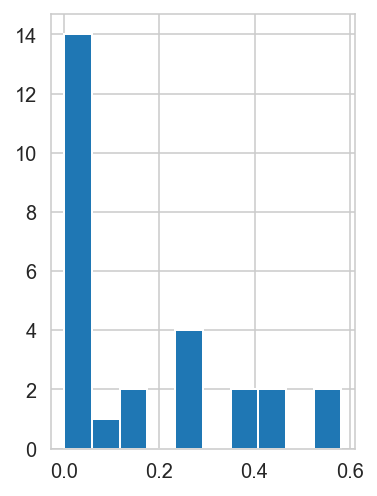

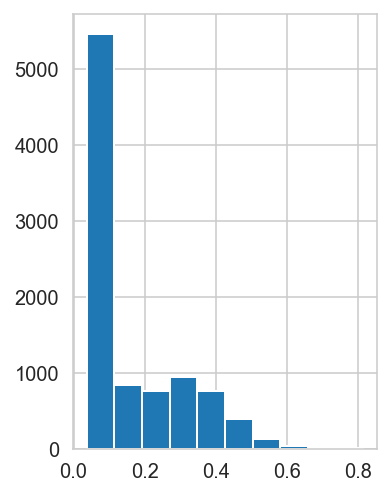

In [88]:
manager_nodes = [n for n,d in G.nodes(data=True) if d['bipartite']=='investmentManager']
company_nodes = [n for n,d in G.nodes(data=True) if d['bipartite']=='Company']

dcs = nx.bipartite.degree_centrality(G,manager_nodes)
nx.bipartite.degree_centrality(G,company_nodes)

manager_dcs = [dcs[n] for n in manager_nodes]
company_dcs = [dcs[n] for n in company_nodes]

plt.subplot(121)
plt.hist(manager_dcs)
plt.show()
plt.subplot(122)
plt.hist(company_dcs)
plt.show()

In [89]:
#add degree of centrality score of each node to metadata dictionary
for n in G.nodes():
    G.nodes()[n]['centrality'] = dcs[n]
#Check by: G.nodes(data=True)

Text(0.5, 1.0, 'Number of investments asset managers have - 2021')

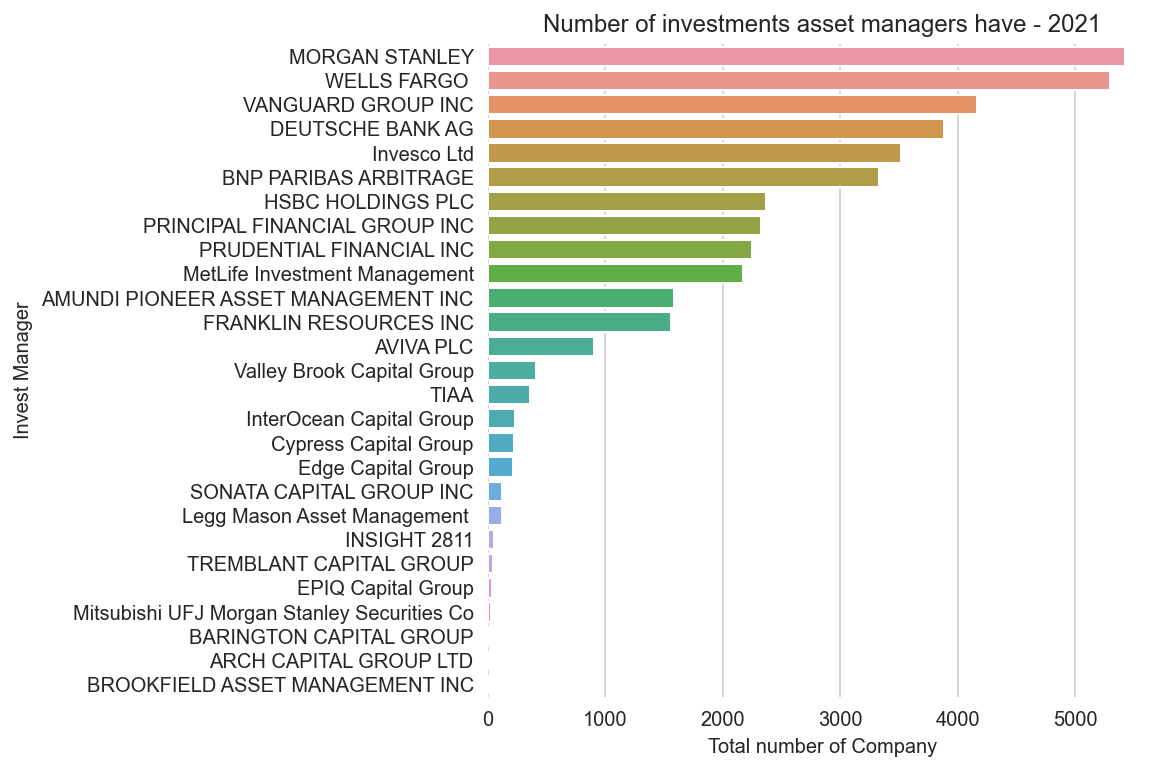

In [5]:
#From Ivana
df2021 = pd.DataFrame(list(investManager_totalCompany_2021.items()), columns = ['Invest Manager', 'Total number of Company'])
df2021 = df2021.sort_values('Total number of Company', ascending = False)
sns.set_style(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x= 'Total number of Company', y= 'Invest Manager', data = df2021)

sns.despine(left=True, bottom=True)
plt.xlabel('Total number of Company')
plt.ylabel('Invest Manager')
plt.title('Number of investments asset managers have - 2021')

The simpler way to find a significant nodes in a network using "DEGREE". A node’s degree is the sum of its edges.
This will give the result same as panda table investManager_totalCompany (above)

In [147]:
import operator
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True)

print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

3. NODE SIMILARITY: the number of shared nodes in other partition between 2 nodes of the same partition

NODE SIMILARITY of 2 investmentManagers : the number of shared companies that they both having investment in. With large number of shared assets, two investmentManger can have the similar degree of business. Two huge investmentManagers have more mutual investments (tendency), compare the stock value of mutual assets can give a clearer insight into their business.

NODE SIMILARITY of 2 Companies: the number of shared investmentManagers that invest on both of them. 

In [126]:
def shared_partition_nodes(G,node1,node2):
    #Check if 2 nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']
    #Get node 1 neighbors:
    nbrs1 = G.neighbors(node1)
    #Get node 2 neighbors:
    nbrs2 = G.neighbors(node2)
    #Compute the overlap
    overlap = set(nbrs1).intersection(set(nbrs2))
    return len(overlap)

manager_pair = list(combinations(manager_nodes,2))

def shared_partition_table(G,listOfPair):
    score =[]
    ele1=[]
    ele2=[]
    for pair in listOfPair:
        ele1.append(pair[0])
        ele2.append(pair[1])
        score.append(shared_partition_nodes(G,pair[0],pair[1]))
        shared_company_table = pd.DataFrame({'Node 1':ele1, 'Node 2':ele2, 'Number of shared nodes':score})
    return shared_company_table.sort_values('Number of shared nodes', ascending = False)

shared_partition_table(G,manager_pair)

#company_pair = list(combinations(company_nodes,2))
#shared_partition_table(G,company_pair)

,Node 1,Node 2,Number of shared nodes
305,0000895421,0000072971,5086
329,0001104659,0000072971,4057
298,0000895421,0001104659,3969
169,0000948046,0000895421,3833
179,0000948046,0000072971,3766
...,...,...,...
86,0001567619,0000038777,0
87,0001567619,0000895421,0
88,0001567619,0001628280,0
201,0001725547,0001841616,0


4. NODE DISSIMILARITY: the number/list of nodes that belong to one node but not in another node. 

DISSIMILARITY of 2 investmentManagers : => Recommendation on new investment or insight into competitors investment

DISSIMILARITY of 2 Companies: not so intuitive

In [132]:
def diff_partition_nodes(G,node1,node2):
    #Check if 2 nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']
    #Get node 1 neighbors:
    nbrs1 = G.neighbors(node1)
    #Get node 2 neighbors:
    nbrs2 = G.neighbors(node2)
    #Compute the overlap
    difference = set(nbrs1).difference(set(nbrs2))
    return len(difference)

def diff_partition_table(G,listOfPair):
    score =[]
    ele1=[]
    ele2=[]
    for pair in listOfPair:
        ele1.append(pair[0])
        ele2.append(pair[1])
        score.append(diff_partition_nodes(G,pair[0],pair[1]))
        diff_company_table = pd.DataFrame({'Node 1':ele1, 'Node 2':ele2, 'Number of nodes belong to node1 but not node2':score})
    return diff_company_table.sort_values('Number of nodes belong to node1 but not node2', ascending = False)

diff_partition_table(G,manager_pair)

,Node 1,Node 2,Number of nodes belong to node1 but not node2
302,0000895421,0001172036,5409
297,0000895421,0001545545,5402
303,0000895421,0001214659,5384
304,0000895421,0000930413,5316
301,0000895421,0001606587,5287
...,...,...,...
249,0001580642,0000895421,0
204,0001725547,0000895421,0
187,0001779453,0000895421,0
349,0001214659,0000072971,0


5. SHORTEST_PATH_MEASUREMENT:  shortest_path will be a list of the nodes that includes the “source” , the “target” , and the nodes between them.

If two nodes have many shared nodes: shortest-path would be the shared node  

If two nodes do not have shared nodes: shortest-path will involve a same partition node and other nodes that nearest related to each other

In [153]:
#Find shortest path between two manager has the most number of diff nodes
test1 = nx.shortest_path(G, source="0000895421", target="0001172036")
print("Shortest path between 0000895421 and 0001172036:", test1)

#Find shortest path between two manager do not have shared nodes
test2 = nx.shortest_path(G, source="0000950123", target="0000947484")
print("Shortest path between 0000950123 and 0000947484:", test2)

Shortest path between 0000895421 and 0001172036: ['0000895421', 'ABBVIE INC', '0001172036']
Shortest path between 0000950123 and 0000947484: ['0000950123', '10X GENOMICS INC', '0001140022', 'ISHARES TR', '0000947484']


6. INVOLVING EDGE WEIGHT

edge weight can be define as the stock amount investing in each company: ('0000950123', '10X GENOMICS INC', {'amount': 174263})

calculate the total investment can define a subgroup of investManager that have the highest amount of asset for further analysis

using edge weight to define the distance of investmentManage-company edge in visualization

Text(0.5, 1.0, 'Total number of Investment')

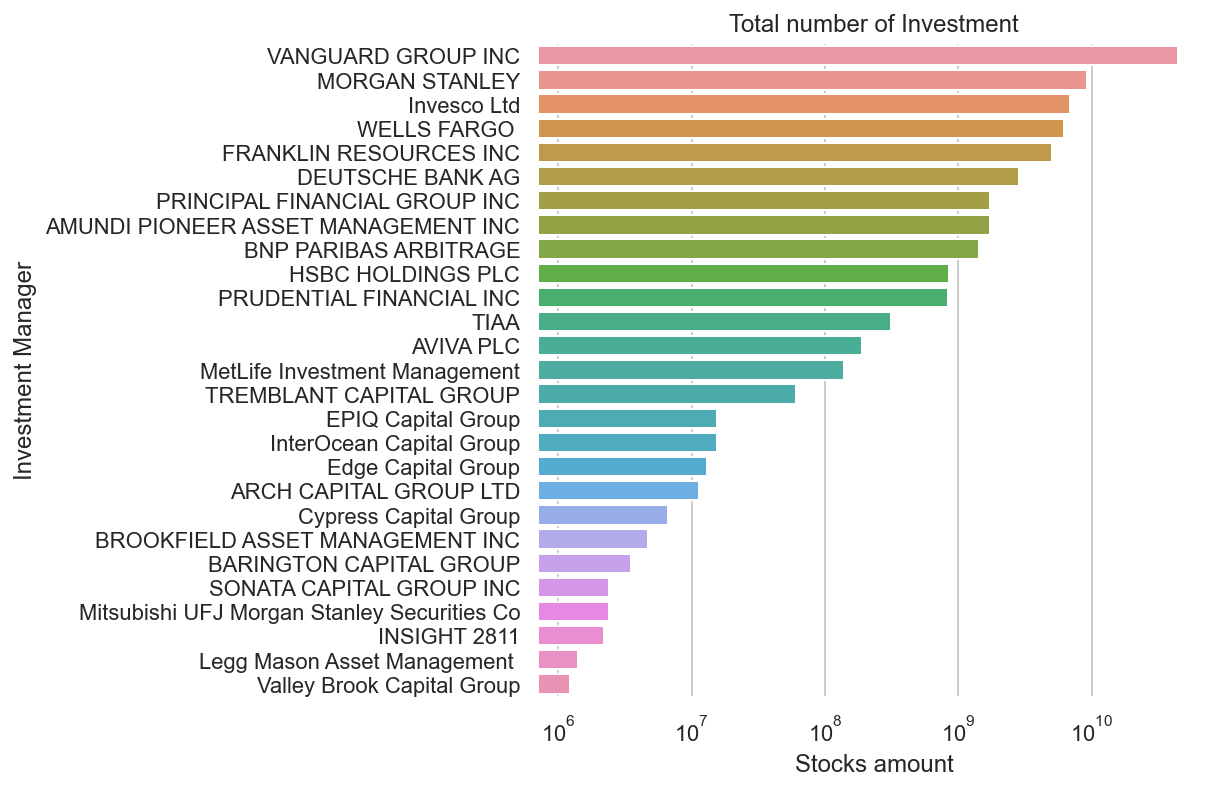

In [156]:
#From Ivana
MTI = pd.DataFrame(list(investManager_totalInvestment_2021.items()), columns = ['Investment Manager', 'total Investment/stock'])
MTI = MTI.sort_values('total Investment/stock', ascending = False)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
g = sns.barplot(x= 'total Investment/stock', y= 'Investment Manager', data = MTI)
g.set_xscale('log')

sns.despine(left=True, bottom=True)
plt.xlabel('Stocks amount')
plt.ylabel('Investment Manager')
plt.title('Total number of Investment')

In [173]:
#5 InvestmentManager that has higest Stock and Company connection
A = pd.concat([df2021, MTI['total Investment/stock']], axis=1)
A = A.sort_values(["Total number of Company", "total Investment/stock"], ascending = (False, False))
B= A.head()['Invest Manager']

In [186]:
subgroup1=[]
for name in B:
    for cik, n in names_dict.items():
        if name == n:
            subgroup1.append(cik)

7. SUBGRAPH

Sometimes it is important to just analyze a subset of nodes in a network (aka. the top 10 most influent investManager). To do so, copy graph into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

In [ ]:
#Example of subgraph of only connected nodes
components = nx.connected_components(G)
largest_component = max(components, key=len)
len(largest_component)
subgraph = G.subgraph(largest_component)
#diameter is the lIength of the path between the two nodes that are furthest apart
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

In [2]:
print(nx.info(subgraph))

NameError: name 'nx' is not defined

VISUALIZATION: you can ignore this part, i will update later if i found a better way to visualize the data

In [ ]:
#c = nv.CircosPlot(G, node_grouping='bipartite', node_color='bipartite')
#c.draw()
#plt.show()

In [1]:
#nx.spring_layout(G)

Text(0.5, 1.0, 'Total number of Investment')

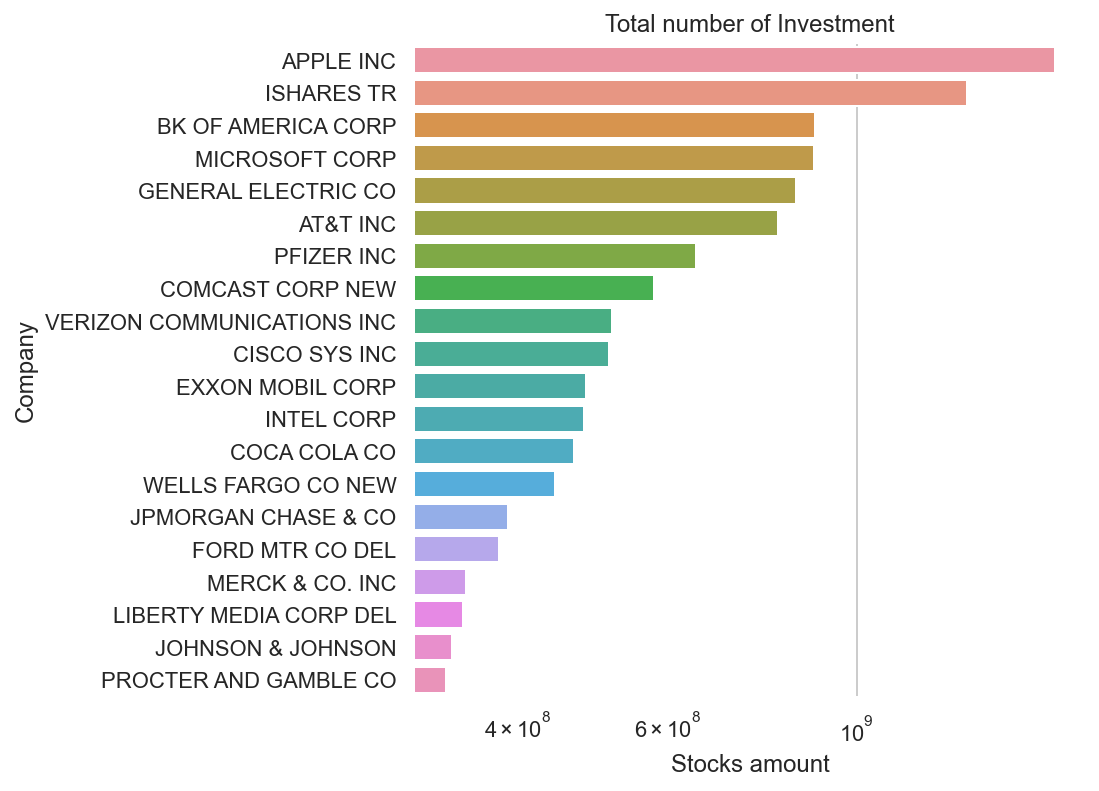

In [160]:
# Company with most investment in: 
CTI = pd.DataFrame(list(company_totalInvestment_2021.items()), columns = ['Company', 'total Investment/stock'])
CTI = CTI.sort_values('total Investment/stock', ascending = False)
#Take only 20 companies with most stocks
CTI_sub = CTI.head(20)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
g = sns.barplot(x= 'total Investment/stock', y= 'Company', data = CTI_sub)
g.set_xscale('log')

sns.despine(left=True, bottom=True)
plt.xlabel('Stocks amount')
plt.ylabel('Company')
plt.title('Total number of Investment')